## 1) Tools and Dataset

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../../dataset/dataset.csv', usecols=[0,1,2,3,4])

## 2) EDA and Preparation

In [3]:
## reviewing the training data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   2086 non-null   object 
 1   AUSPRAEGUNG  2086 non-null   object 
 2   JAHR         2086 non-null   int64  
 3   MONAT        2086 non-null   object 
 4   WERT         2002 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.6+ KB


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


In [4]:
print(df['JAHR'].unique())
len(df['JAHR'].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2002 2001 2000]


23

In [5]:
df.isna().sum()

MONATSZAHL      0
AUSPRAEGUNG     0
JAHR            0
MONAT           0
WERT           84
dtype: int64

In [6]:
df=df[df.JAHR < 2021].reset_index().drop(columns=['index'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1911 non-null   object 
 1   AUSPRAEGUNG  1911 non-null   object 
 2   JAHR         1911 non-null   int64  
 3   MONAT        1911 non-null   object 
 4   WERT         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 74.8+ KB


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0


In [7]:
df.isna().sum()

MONATSZAHL     0
AUSPRAEGUNG    0
JAHR           0
MONAT          0
WERT           0
dtype: int64

In [8]:
print(df['JAHR'].unique())
len(df['JAHR'].unique())

[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001 2000]


21

In [9]:
df.MONAT.unique()

array(['Summe', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '201505',
       '201506', '201507', '201508', '201509', '201510', '201511',
       '201512', '201401', '201402', '201403', '201404', '201405',
       '201406', '201407', '201408', '201409', '201410', '201411',
       '201412', '201301', '201302', '201303', '201304', '20130

In [10]:
# Summe is a German word means Total; sum of accidents/year.

df["MONAT"].value_counts()["Summe"]

147

In [11]:
# since the "Summe" records don't give any valuable indication for the value/month prediction task, they could be dropped.

df= df[df.MONAT != "Summe"].reset_index().drop(columns=['index'])

In [12]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1764 non-null   object 
 1   AUSPRAEGUNG  1764 non-null   object 
 2   JAHR         1764 non-null   int64  
 3   MONAT        1764 non-null   object 
 4   WERT         1764 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 69.0+ KB


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,202001,28.0
1,Alkoholunfälle,insgesamt,2020,202002,40.0
2,Alkoholunfälle,insgesamt,2020,202003,27.0
3,Alkoholunfälle,insgesamt,2020,202004,26.0
4,Alkoholunfälle,insgesamt,2020,202005,40.0


In [13]:
for i in range(len(df["MONAT"])):
    df["MONAT"][i]= df["MONAT"][i][-2:]

In [14]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,01,28.0
1,Alkoholunfälle,insgesamt,2020,02,40.0
2,Alkoholunfälle,insgesamt,2020,03,27.0
3,Alkoholunfälle,insgesamt,2020,04,26.0
4,Alkoholunfälle,insgesamt,2020,05,40.0


In [15]:
df.MONAT.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [16]:
df= df.astype({'MONAT': 'int64'})
print(df.dtypes)

MONATSZAHL      object
AUSPRAEGUNG     object
JAHR             int64
MONAT            int64
WERT           float64
dtype: object


In [17]:
df["MONAT"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [18]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,1,28.0
1,Alkoholunfälle,insgesamt,2020,2,40.0
2,Alkoholunfälle,insgesamt,2020,3,27.0
3,Alkoholunfälle,insgesamt,2020,4,26.0
4,Alkoholunfälle,insgesamt,2020,5,40.0


In [19]:
print(df["MONATSZAHL"].value_counts())
print(df["AUSPRAEGUNG"].value_counts())
print(df["JAHR"].value_counts())
print(df["MONAT"].value_counts())

Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: MONATSZAHL, dtype: int64
insgesamt                 756
Verletzte und Getötete    756
mit Personenschäden       252
Name: AUSPRAEGUNG, dtype: int64
2020    84
2009    84
2001    84
2002    84
2003    84
2004    84
2005    84
2006    84
2007    84
2008    84
2010    84
2019    84
2011    84
2012    84
2013    84
2014    84
2015    84
2016    84
2017    84
2018    84
2000    84
Name: JAHR, dtype: int64
1     147
2     147
3     147
4     147
5     147
6     147
7     147
8     147
9     147
10    147
11    147
12    147
Name: MONAT, dtype: int64


In [20]:
#  the dataset includes:

#     22 years               (2000:2021)
#     12 month/year          (1:12)
#     3 accident categories  (traffic, alcohol, escape)
#     3 accident losses      (death, injury, both)


# _____________________________________________________

#     Categories and Losses

#         Verkehrsunfälle (traffic):

#             Verletzte und Getötete (death)    252   >   21 years * 12 months
#             mit Personenschäden    (injury)   252
#             insgesamt              (both)     252
#                                               756 (total)

#         Alkoholunfälle (Alcohol):
#             Verletzte und Getötete (death)    252
#             insgesamt              (both)     252
#                                               504 (total)

#         Fluchtunfälle (escape):
#             Verletzte und Getötete (death)    252
#             insgesamt              (both)     252
#                                               504 (total)

# _____________________________________________________

#     Year and Month

#         JAHR:
#             each year                          84   >   7 (categories & losses) * 12 months

#         MONAT:
#             each month                         147   >   7 (categories & losses) * 21 years

# _____________________________________________________





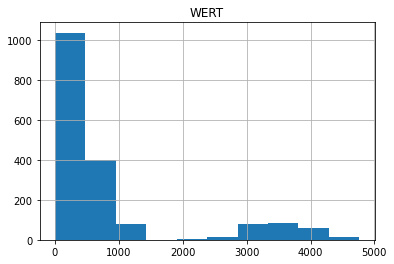

In [21]:
df.hist(column= 'WERT')
plt.show()

<AxesSubplot:ylabel='Density'>

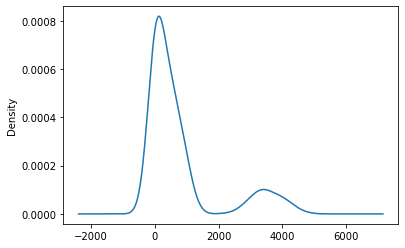

In [22]:
df["WERT"].plot.kde()

In [23]:
df['WERT'].describe()

count    1764.000000
mean      780.292517
std      1180.838117
min         0.000000
25%        38.750000
50%       360.000000
75%       813.250000
max      4763.000000
Name: WERT, dtype: float64

In [24]:
print(df[df.WERT == 0]["WERT"].count())
print(df[df.WERT == 0])

1
         MONATSZAHL             AUSPRAEGUNG  JAHR  MONAT  WERT
337  Alkoholunfälle  Verletzte und Getötete  2013      2   0.0


In [25]:
print(df[df.WERT == 4763]["WERT"].count())
print(df[df.WERT == 4763])

1
           MONATSZAHL AUSPRAEGUNG  JAHR  MONAT    WERT
1026  Verkehrsunfälle   insgesamt  2019      7  4763.0


In [26]:
# that means:
#     - from 2000:2020, every month witnessed the 3 accident caterogries, resulting in all the loss types (death, injury, both)
#       except Feb-2013; no "alcohol" accidents resulted in death.
#     - the highest number of accident/month/category, was in July-2019, "traffic" category (loss: insgesamt).

## 3) Mission 1

#### - Visualising historically the number of accidents per category
#### - Creating the AI model

### 3.1) Number of Accidents per Category 

In [28]:
# Number of total accidents per each specific month, along 2000:2020, in order to find the max/min month during the year.

rate_per_month= []
for i in df.MONAT.unique():
    temp= df[df.MONAT== i]["WERT"].sum()
    print(f"Number of total accidents in month ({i})","throughout the period 2000:2020 is:", temp)
    rate_per_month.append(temp)
    
print()
print("Maximum month is: %d >" % df.MONAT[rate_per_month.index(max(rate_per_month))], max(rate_per_month), "accidents")
print("Minimum month is: %d >" % df.MONAT[rate_per_month.index(min(rate_per_month))], min(rate_per_month), "accidents")

Number of total accidents in month (1) throughout the period 2000:2020 is: 94974.0
Number of total accidents in month (2) throughout the period 2000:2020 is: 95847.0
Number of total accidents in month (3) throughout the period 2000:2020 is: 110494.0
Number of total accidents in month (4) throughout the period 2000:2020 is: 111716.0
Number of total accidents in month (5) throughout the period 2000:2020 is: 122488.0
Number of total accidents in month (6) throughout the period 2000:2020 is: 120575.0
Number of total accidents in month (7) throughout the period 2000:2020 is: 138930.0
Number of total accidents in month (8) throughout the period 2000:2020 is: 106428.0
Number of total accidents in month (9) throughout the period 2000:2020 is: 124749.0
Number of total accidents in month (10) throughout the period 2000:2020 is: 128404.0
Number of total accidents in month (11) throughout the period 2000:2020 is: 113899.0
Number of total accidents in month (12) throughout the period 2000:2020 is: 

In [33]:
# Number of accidents along 2000:2020, per year.

# The output is a list of lists, with dimension: 3 categories x 21 years

print(df.MONATSZAHL.unique())
print()

annual_per_cat= []
for i in df.MONATSZAHL.unique():
    per_cat_per_yr= []
    for j in df.JAHR.unique():
        sum_of_acc_per_cat_per_yr= df[df.MONATSZAHL == i][df.JAHR == j]["WERT"].sum()
        per_cat_per_yr.append(sum_of_acc_per_cat_per_yr)
    annual_per_cat.append(per_cat_per_yr)
print(annual_per_cat)

['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']

[[680.0, 661.0, 580.0, 585.0, 445.0, 636.0, 549.0, 530.0, 663.0, 595.0, 603.0, 643.0, 722.0, 841.0, 885.0, 881.0, 963.0, 1049.0, 1182.0, 1239.0, 1310.0], [10489.0, 12314.0, 12203.0, 11814.0, 11727.0, 11867.0, 11403.0, 11707.0, 11685.0, 10756.0, 10355.0, 9726.0, 9834.0, 9603.0, 9134.0, 11562.0, 11089.0, 10173.0, 11279.0, 12083.0, 12125.0], [49056.0, 57562.0, 58406.0, 56574.0, 58535.0, 58589.0, 58995.0, 58896.0, 56620.0, 52857.0, 46946.0, 46391.0, 47151.0, 48061.0, 48888.0, 52599.0, 51497.0, 50052.0, 53254.0, 59113.0, 57224.0]]


In [34]:
# Number of accidents along 2000:2020, per month.

# The output is a list of lists of lists, with dimension: 3 categories x 21 years x 12 months

monthly_per_cat= []
for i in df.MONATSZAHL.unique():   # in this order: ['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle']
    
    per_cat_per_yr= []
    for j in df.JAHR.unique():
        
        per_cat_per_month= []
        for k in df.MONAT.unique():
            sum_of_acc_per_cat_per_month= df[df.MONATSZAHL == i][df.JAHR == j][df.MONAT == k]["WERT"].sum()
            per_cat_per_month.append(sum_of_acc_per_cat_per_month)
            
        per_cat_per_yr.append(per_cat_per_month)  
        
    monthly_per_cat.append(per_cat_per_yr)
    
print(monthly_per_cat)

[[[39.0, 59.0, 40.0, 41.0, 66.0, 79.0, 101.0, 75.0, 70.0, 54.0, 34.0, 22.0], [29.0, 35.0, 56.0, 54.0, 60.0, 64.0, 82.0, 54.0, 67.0, 65.0, 48.0, 47.0], [30.0, 37.0, 44.0, 33.0, 57.0, 53.0, 80.0, 58.0, 58.0, 59.0, 44.0, 27.0], [23.0, 26.0, 51.0, 36.0, 45.0, 68.0, 70.0, 44.0, 69.0, 48.0, 46.0, 59.0], [27.0, 13.0, 26.0, 35.0, 42.0, 49.0, 58.0, 46.0, 51.0, 41.0, 27.0, 30.0], [43.0, 26.0, 32.0, 52.0, 80.0, 58.0, 86.0, 78.0, 70.0, 37.0, 41.0, 33.0], [25.0, 24.0, 53.0, 50.0, 47.0, 47.0, 56.0, 45.0, 61.0, 57.0, 56.0, 28.0], [19.0, 15.0, 29.0, 33.0, 54.0, 57.0, 66.0, 61.0, 64.0, 43.0, 47.0, 42.0], [32.0, 23.0, 26.0, 56.0, 87.0, 78.0, 86.0, 86.0, 73.0, 38.0, 40.0, 38.0], [41.0, 32.0, 31.0, 70.0, 63.0, 48.0, 66.0, 51.0, 58.0, 36.0, 56.0, 43.0], [26.0, 33.0, 43.0, 58.0, 49.0, 59.0, 77.0, 65.0, 80.0, 40.0, 35.0, 38.0], [30.0, 44.0, 19.0, 76.0, 91.0, 50.0, 71.0, 61.0, 67.0, 50.0, 36.0, 48.0], [40.0, 46.0, 39.0, 35.0, 94.0, 88.0, 76.0, 67.0, 77.0, 64.0, 41.0, 55.0], [49.0, 47.0, 52.0, 76.0, 102.0, 78.

In [35]:
print("Categories: ", len(monthly_per_cat))
print("Number of years: ", len(monthly_per_cat[0]))
print("Number of months/year: ", len(monthly_per_cat[0][0]))

Categories:  3
Number of years:  21
Number of months/year:  12


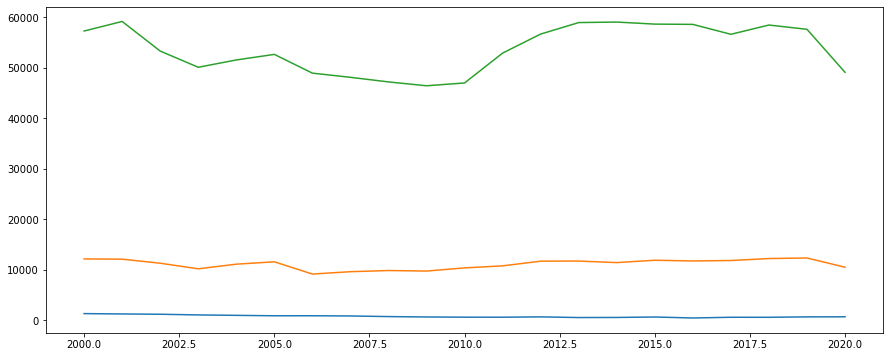

In [36]:
# Annual: Alcohol, Escape, Traffic (respectively)

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df["JAHR"].unique(), annual_per_cat[0]) #Alcohol (lower curve)
ax.plot(df["JAHR"].unique(), annual_per_cat[1]) #Escape  (middle curve)
ax.plot(df["JAHR"].unique(), annual_per_cat[2]) #Traffic (upper curve)

fig.show()

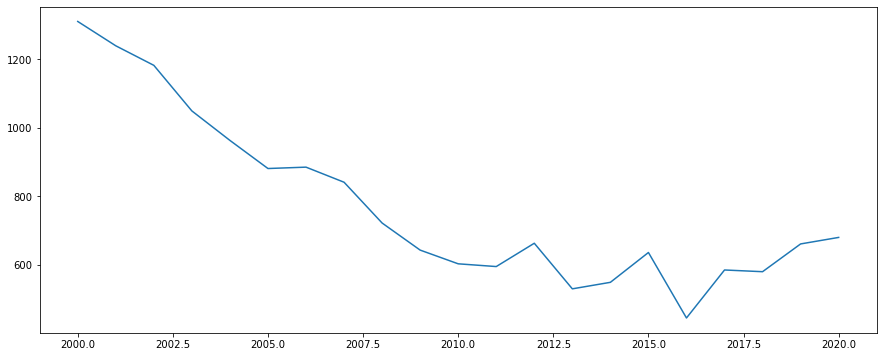

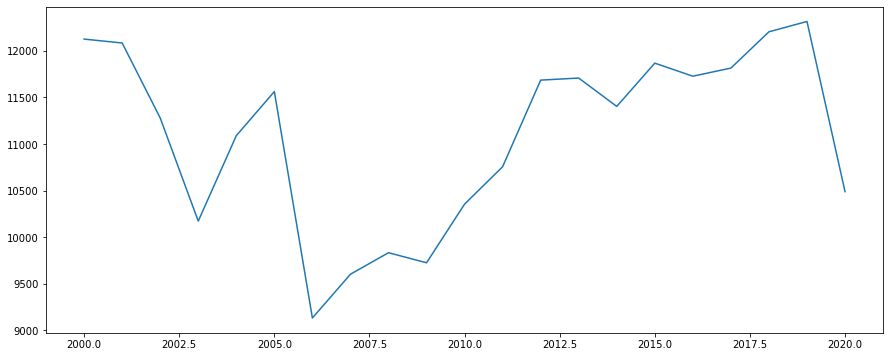

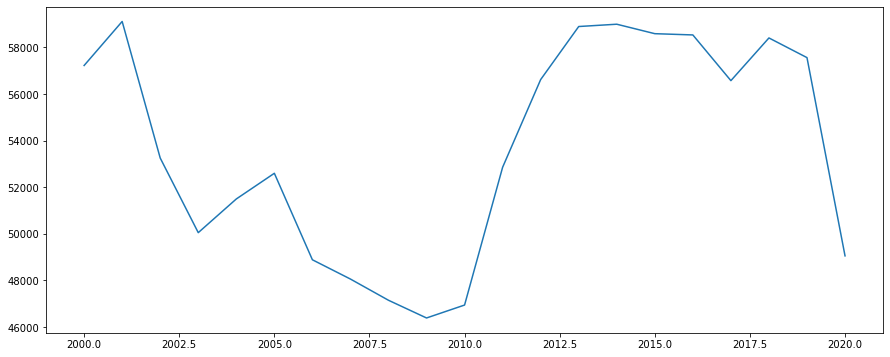

In [37]:
# Annual:

# Alcohol
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df["JAHR"].unique(), annual_per_cat[0])
fig.show()

# Escape
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df["JAHR"].unique(), annual_per_cat[1])
fig.show()

# Traffic
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df["JAHR"].unique(), annual_per_cat[2])
fig.show()

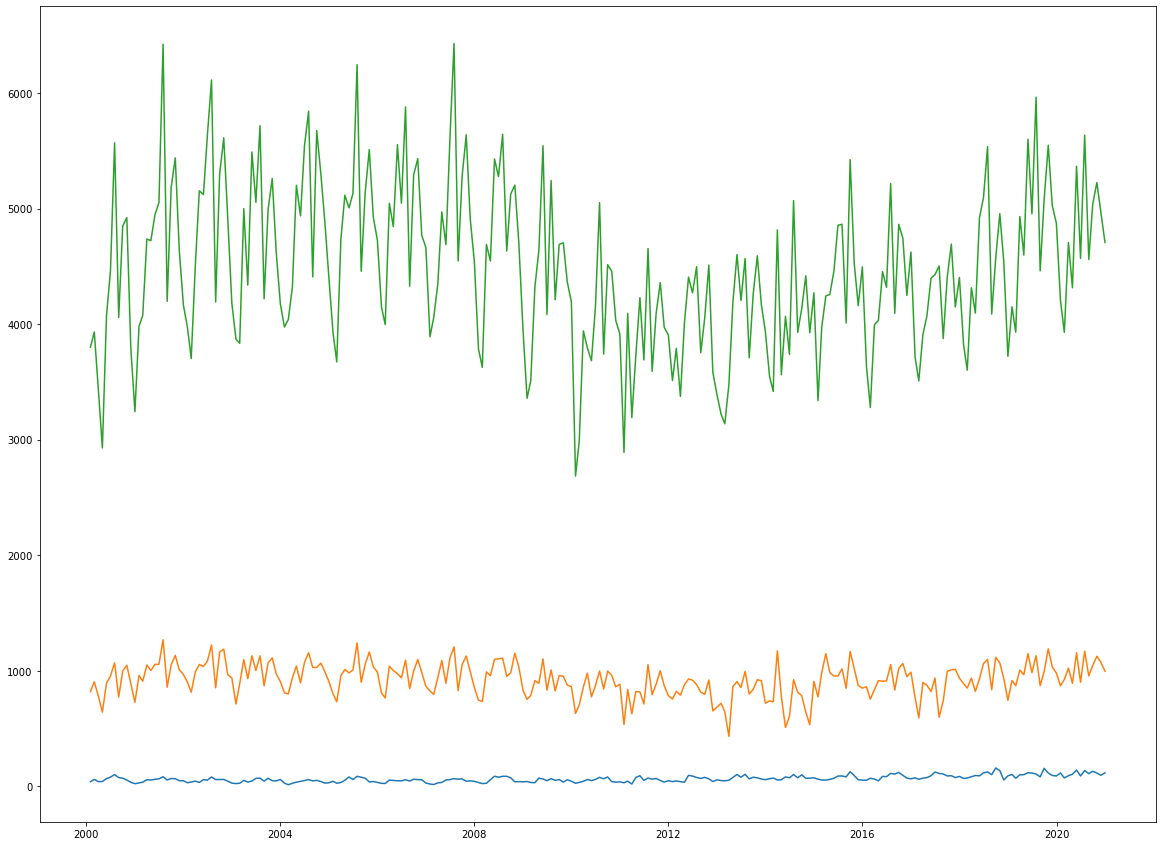

In [40]:
# Monthly: Alcohol, Escape, Traffic

fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(pd.date_range(start='1/1/2000', periods=252, freq='M'), np.array(monthly_per_cat[0]).reshape(252,1)) #Alcohol (lower curve)
ax.plot(pd.date_range(start='1/1/2000', periods=252, freq='M'), np.array(monthly_per_cat[1]).reshape(252,1)) #Escape  (middle curve)
ax.plot(pd.date_range(start='1/1/2000', periods=252, freq='M'), np.array(monthly_per_cat[2]).reshape(252,1)) #Traffic (upper curve)

fig.show()

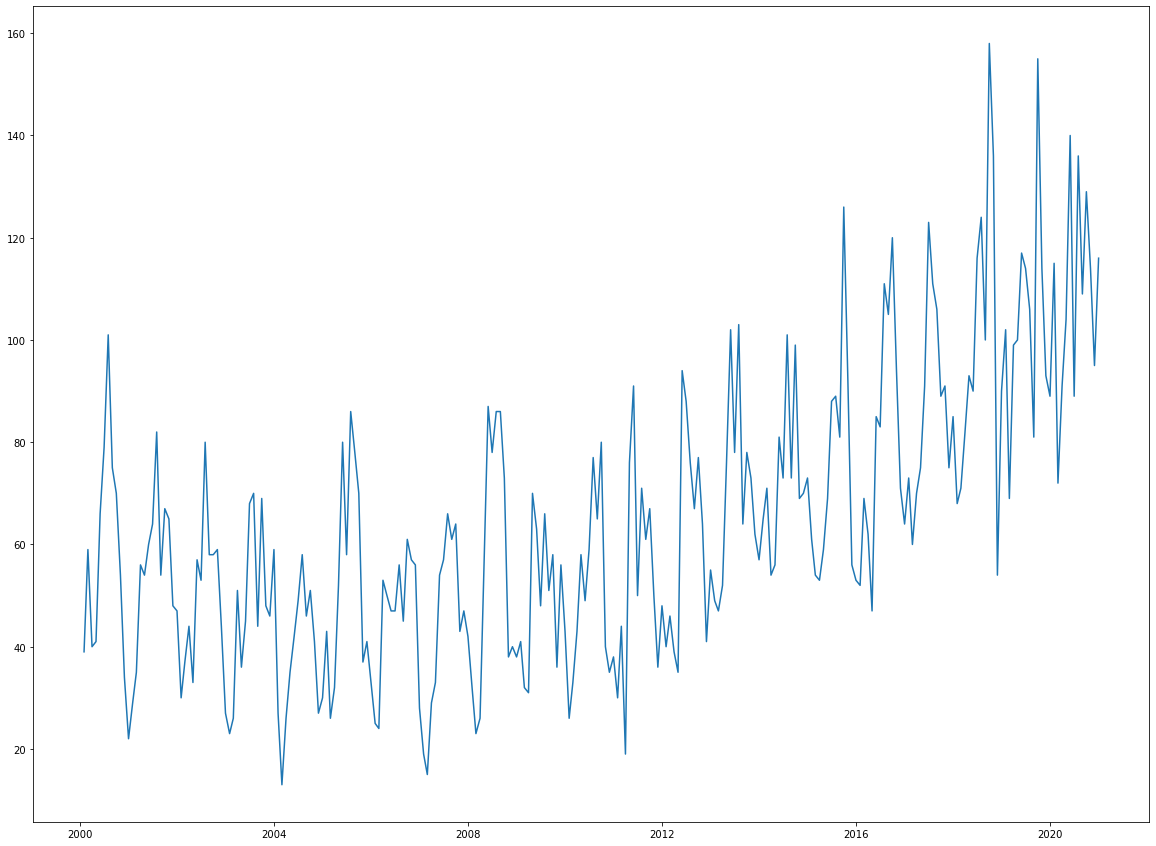

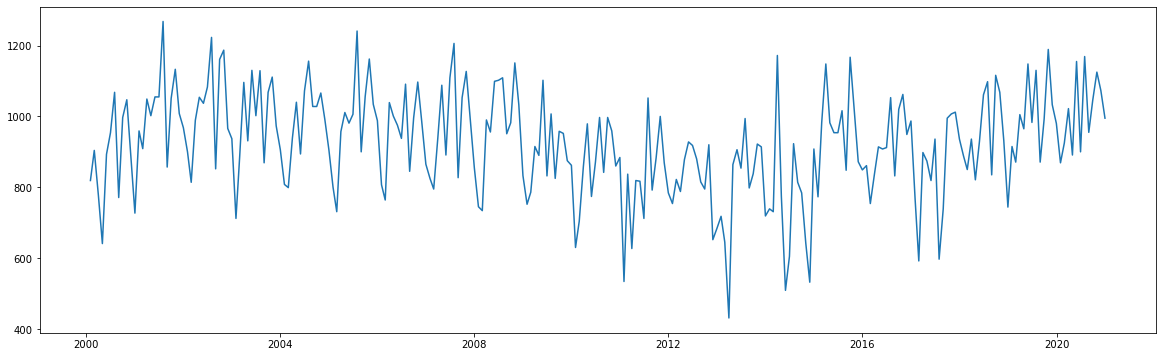

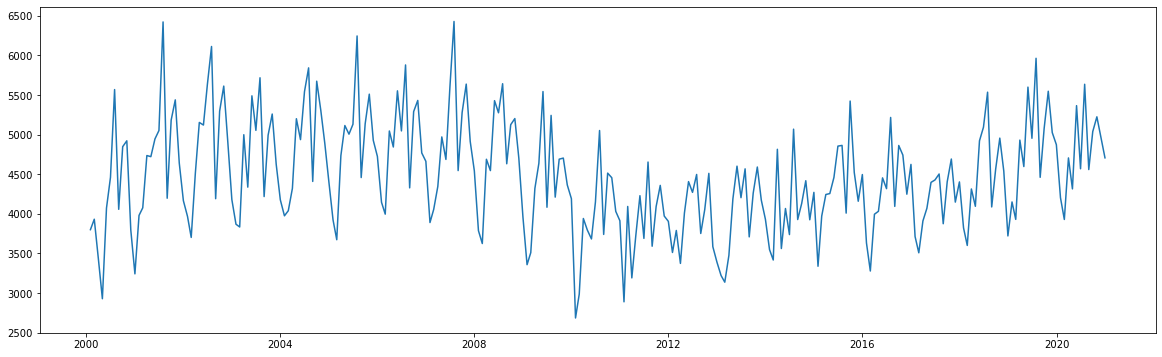

In [41]:
# Monthly:

# Alcohol
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(pd.date_range(start='1/1/2000', periods=252, freq='M'), np.array(monthly_per_cat[0]).reshape(252,1))
fig.show()

# Escape
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(pd.date_range(start='1/1/2000', periods=252, freq='M'), np.array(monthly_per_cat[1]).reshape(252,1))
fig.show()

# Traffic
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(pd.date_range(start='1/1/2000', periods=252, freq='M'), np.array(monthly_per_cat[2]).reshape(252,1))
fig.show()

### 3.2) AI Model